In [10]:
from Model2 import RiverDeltaModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
import copy
import matplotlib.lines as mlines

In [11]:
warnings.simplefilter("ignore")

model = RiverDeltaModel()
initial_model_state = copy.deepcopy(model) 

pos = nx.spring_layout(model.G)

for j in range(300):
    model.step()

weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
0
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
0
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
0
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
0
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weharvesten!
weha

In [3]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data = agent_data.xs(3, level="AgentID")
#agent_data = agent_data[agent_data["Agent_type"] == "Agri_small_saline"]
agent_data

,Agent_type,Age,Salinity,Savings,Loan_size,maximum_debt,income,abilities,current_crop,New crop
Step,,,,,,,,,,
12,Agri_small_saline,"[2, 3, 4, 5, 30, 31, 52]",8.007578,-9526.521162,4763.260581,1679.569005,0.000000,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Coconut
24,Agri_small_saline,"[0, 3, 4, 5, 6, 31, 32, 53]",8.007578,-16668.872735,4763.260581,1679.569005,0.000000,"[{'strategy': 'Rice', 'FA': 0, 'IA': 1, 'TA': ...",Coconut,Coconut
36,Agri_small_saline,"[1, 4, 5, 6, 7, 32, 33, 54]",8.007578,-21969.828329,4763.260581,1679.569005,1983.747551,"[{'strategy': 'Rice', 'FA': 0, 'IA': 0.7142857...",Coconut,Coconut
48,Agri_small_saline,"[2, 5, 6, 7, 8, 33, 34, 55]",8.007578,-27139.963292,4763.260581,1679.569005,2114.568181,"[{'strategy': 'Rice', 'FA': 0, 'IA': 1, 'TA': ...",Coconut,Coconut
60,Agri_small_saline,"[3, 6, 7, 8, 9, 34, 35, 56]",8.007578,-32778.279563,4763.260581,1679.569005,1646.386874,"[{'strategy': 'Rice', 'FA': 0, 'IA': 1, 'TA': ...",Coconut,Coconut
72,Agri_small_saline,"[4, 7, 8, 9, 10, 35, 36, 57]",8.007578,-38134.369014,4763.260581,1679.569005,1928.613693,"[{'strategy': 'Rice', 'FA': 0, 'IA': 1, 'TA': ...",Coconut,Coconut
84,Agri_small_saline,"[5, 8, 9, 10, 11, 36, 37, 58]",8.007578,-43369.332404,4763.260581,1679.569005,2049.739755,"[{'strategy': 'Rice', 'FA': 0, 'IA': 1, 'TA': ...",Coconut,Coconut
96,Agri_small_saline,"[6, 9, 10, 11, 12, 37, 38, 59]",8.007578,-48956.642942,4763.260581,1679.569005,1697.392607,"[{'strategy': 'Rice', 'FA': 0, 'IA': 1, 'TA': ...",Coconut,Coconut
108,Agri_small_saline,"[7, 10, 11, 12, 13, 38, 39, 60]",8.007578,-54358.205336,4763.260581,1679.569005,1883.140751,"[{'strategy': 'Rice', 'FA': 0, 'IA': 1, 'TA': ...",Coconut,Coconut


### PLOT AGENTS ON THE MAP

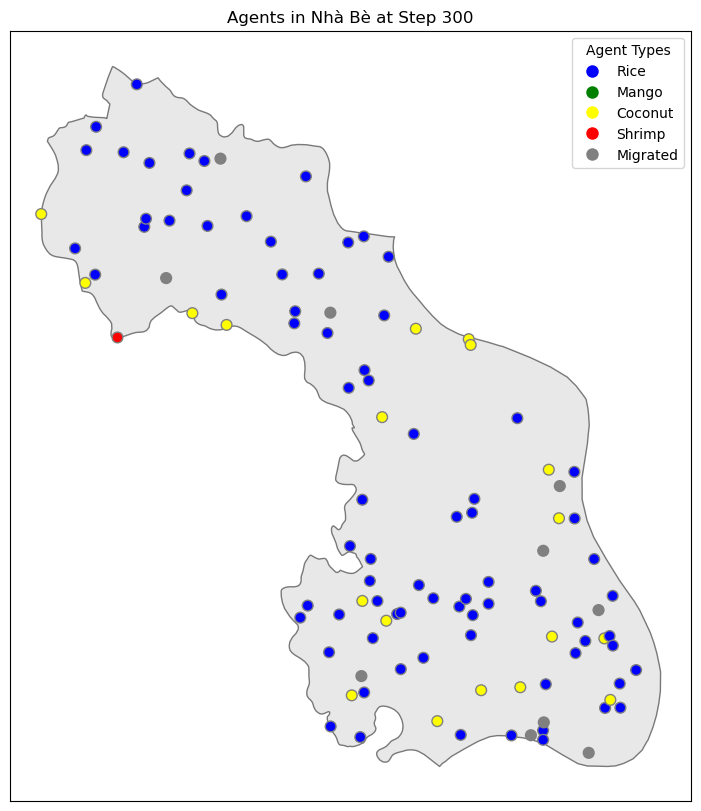

In [14]:
import matplotlib.lines as mlines
from Agents2 import Agri_farmer, Aqua_farmer

def plot_network(ax, model):
    ax.clear()

    # Plot district map, based on district polygon we defined earlier
    model.polygon_districts.plot(ax=ax, facecolor="lightgray", edgecolor="black", alpha=0.5)

    # Get the positions of the nodes
    pos = nx.get_node_attributes(model.G, 'pos')

    # Each farmer agent should be represented by a node. A dictionary is created where each node id will correspond with an agent
    node_to_agent = {}
    for agent in model.agents:
        if isinstance(agent, (Agri_farmer, Aqua_farmer)): # Only farmer agents need to be plotted
            node_to_agent[agent.node_id] = agent

    # Give each node a color, based on their agent type
    colors = []
    for node_id in model.G.nodes():
        agent = node_to_agent.get(node_id)  
        if agent:
            if agent.current_crop == "Rice":
                colors.append('blue')
            elif agent.current_crop == "Mango":
                colors.append('green')
            elif agent.current_crop == "Coconut":
                colors.append("yellow")
            elif agent.current_crop == "Shrimp":
                colors.append('red')  
        else:
            colors.append("gray")  # something went wrong here, so the node is then gray

    # Add legend
    blue_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Rice')
    green_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='Mango')
    yellow_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Coconut')
    red_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=10, label='Shrimp')
    grey_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Migrated')
    ax.legend(handles=[blue_patch, green_patch, yellow_patch, red_patch, grey_patch], loc='upper right', title='Agent Types')

    # Plot netwerk
    # Alleen de nodes waar pos een waarde heeft (en dus kleur)
    nodes_to_draw = list(pos.keys())
    colors_to_draw = []

    for node_id in nodes_to_draw:
        agent = node_to_agent.get(node_id)
        if agent:
            if agent.current_crop == "Rice":
                colors_to_draw.append('blue')
            elif agent.current_crop == "Mango":
                colors_to_draw.append('green')
            elif agent.current_crop == "Coconut":
                colors_to_draw.append("yellow")
            elif agent.current_crop == "Shrimp":
                colors_to_draw.append('red')
        else:
            colors_to_draw.append("gray")  # migrated

    nx.draw_networkx_nodes(model.G, pos,
                        nodelist=nodes_to_draw,
                        node_color=colors_to_draw,
                        node_size=60,
                        edgecolors="gray",
                        ax=ax)

# # Optioneel: edges apart tekenen
# nx.draw_networkx_edges(model.G, pos, ax=ax, edge_color="gray")

    ax.set_title(f"Agents in {model.district} at Step {model.steps}", fontsize=12)

# Call function above to plot the map
fig, ax = plt.subplots(figsize=(10, 10))
plot_network(ax, model)
plt.show()


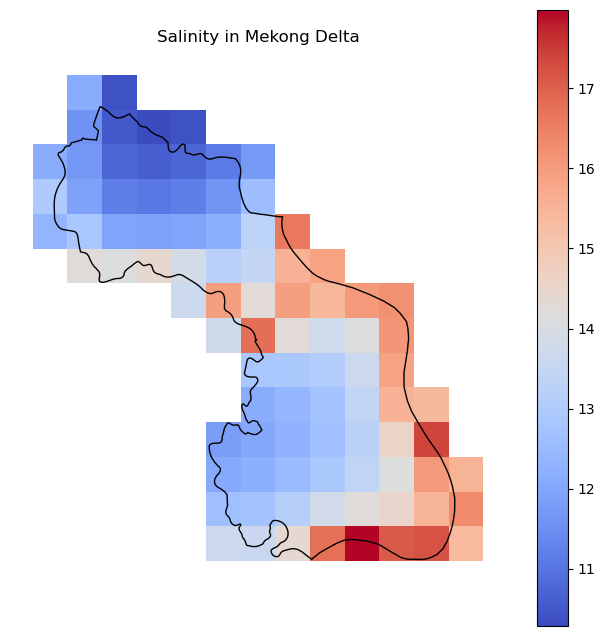

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
model.polygon_districts.boundary.plot(ax=ax, color='black', linewidth=1)
model.data_salinity.plot(ax=ax, column="Salinity", cmap="coolwarm", legend=True)
plt.title("Salinity in Mekong Delta")
plt.axis("off")
plt.show()

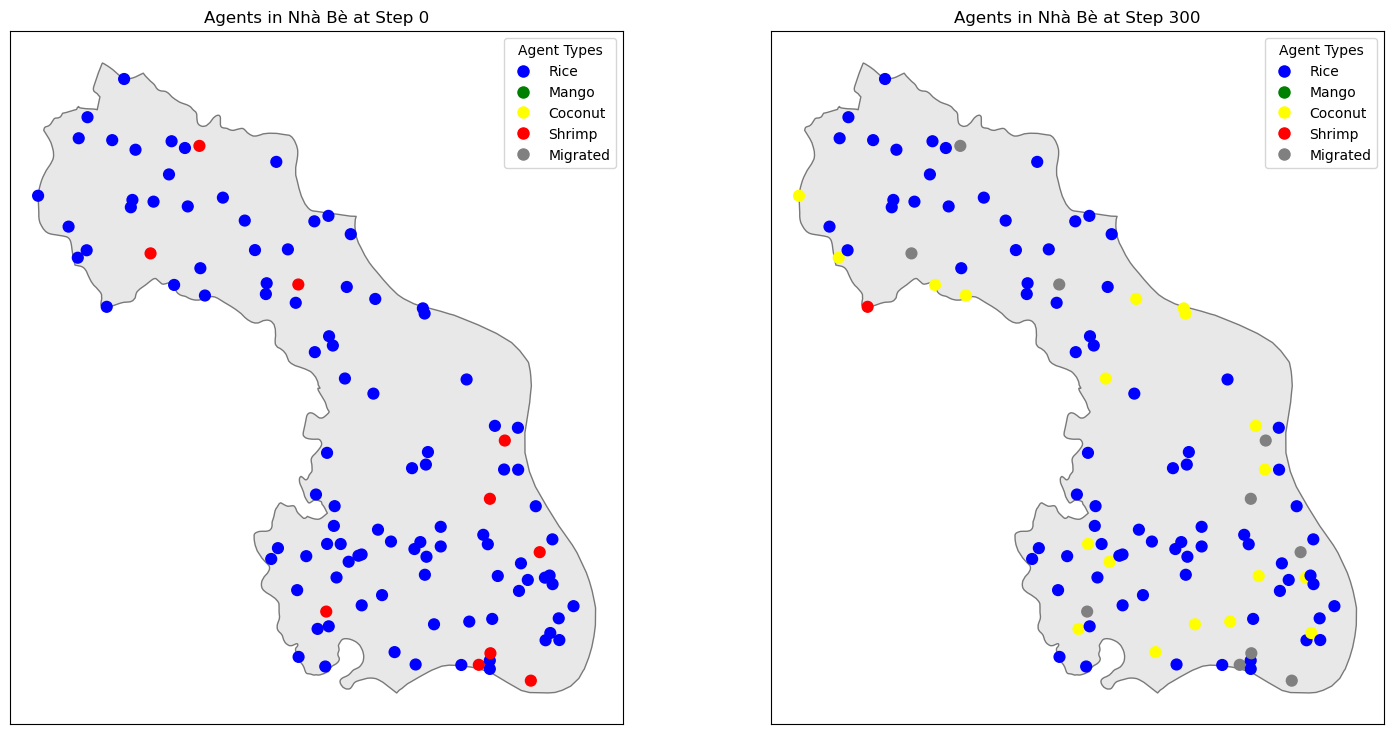

In [18]:
def plot_network(ax, model):
    ax.clear()

    # Plot district map
    model.polygon_districts.plot(ax=ax, facecolor="lightgray", edgecolor="black", alpha=0.5)

    # Get node positions
    pos = nx.get_node_attributes(model.G, 'pos')

    # Map node_id to agent
    node_to_agent = {
        agent.node_id: agent
        for agent in model.agents
        if isinstance(agent, (Agri_farmer, Aqua_farmer))
    }

    # Prepare lists for nodes and their colors
    nodes_to_draw = []
    colors_to_draw = []

    for node_id in model.G.nodes():
        nodes_to_draw.append(node_id)
        agent = node_to_agent.get(node_id)
        if agent:
            if agent.current_crop == "Rice":
                colors_to_draw.append('blue')
            elif agent.current_crop == "Mango":
                colors_to_draw.append('green')
            elif agent.current_crop == "Coconut":
                colors_to_draw.append('yellow')
            elif agent.current_crop == "Shrimp":
                colors_to_draw.append('red')
            else:
                colors_to_draw.append("gray")  # unknown crop
        else:
            colors_to_draw.append("gray")  # migrated / no agent

    # Draw edges first (optional)
    #nx.draw_networkx_edges(model.G, pos, ax=ax, edge_color="gray")

    # Draw nodes with matching colors
    nx.draw_networkx_nodes(model.G, pos,
                           nodelist=nodes_to_draw,
                           node_color=colors_to_draw,
                           node_size=60,
                           ax=ax)

    # Add legend
    blue_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Rice')
    green_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='Mango')
    yellow_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Coconut')
    red_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=10, label='Shrimp')
    grey_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Migrated')
    ax.legend(handles=[blue_patch, green_patch, yellow_patch, red_patch, grey_patch], loc='upper right', title='Agent Types')

    ax.set_title(f"Agents in {model.district} at Step {model.steps}", fontsize=12)

    # Call function above to plot the map
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 9))
plot_network(ax1, initial_model_state)
plot_network(ax2, model)
plt.show()
